In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [ ]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Tensorflow  Keras version: {tf.keras.__version__}")

Tensorflow version: 2.12.0
Tensorflow  Keras version: 2.12.0


In [ ]:
os.getcwd()

'/content'

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid,X_train=X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000 :]
X_test=X_test/255.

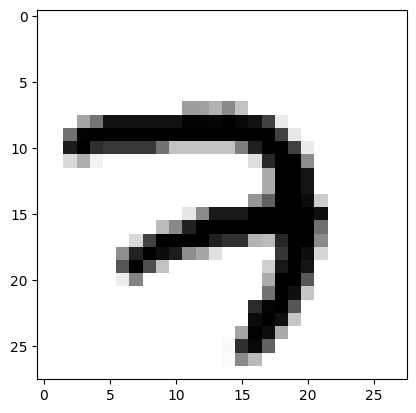

In [ ]:
plt.imshow(X_train[0],cmap='binary')

In [ ]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
         tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")
]

In [ ]:
model_clf=tf.keras.models.Sequential(Layers)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1=model_clf.layers[1]
hidden1.get_weights()[1].shape #1 is index for bias weight

(300,)

In [ ]:
hidden1.get_weights()[0].shape #0 is index for weights

(784, 300)

In [ ]:

Loss_function="sparse_categorical_crossentropy"
Optimizer="SGD"
metrics=["accuracy"]


In [ ]:
model_clf.compile(loss=Loss_function,optimizer=Optimizer,metrics=metrics)

In [ ]:
epochs=30
Validation_set=[X_valid,y_valid]

In [ ]:
history=model_clf.fit(X_train,y_train,epochs=epochs,validation_data=Validation_set,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6072 - accuracy: 0.8404 - val_loss: 0.3022 - val_accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2867 - accuracy: 0.9182 - val_loss: 0.2396 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2343 - accuracy: 0.9330 - val_loss: 0.2038 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2004 - accuracy: 0.9426 - val_loss: 0.1775 - val_accuracy: 0.9520
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.1596 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1551 - accuracy: 0.9556 - val_loss: 0.1439 - val_accuracy: 0.9634
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1391 - accuracy: 0.9604 - val_loss: 0.1343 - val_accuracy:

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607239,0.840418,0.302150,0.9178
1,0.286692,0.918164,0.239613,0.9340
2,0.234315,0.933000,0.203755,0.9442
3,0.200416,0.942582,0.177465,0.9520
4,0.175092,0.950000,0.159559,0.9566
5,0.155084,0.955618,0.143874,0.9634
6,0.139053,0.960436,0.134320,0.9636
7,0.125459,0.964273,0.126026,0.9656
8,0.114430,0.967055,0.117430,0.9672
9,0.104484,0.970855,0.111048,0.9694


In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9790


[0.07043518126010895, 0.9789999723434448]

In [ ]:
X_new=X_test[:3]
y_new=y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

<Axes: >

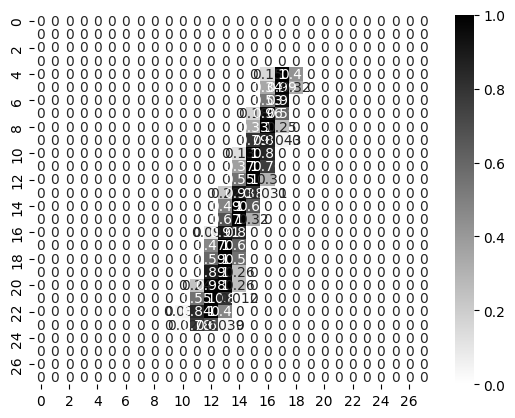

In [ ]:
sns.heatmap(X_new[2],annot=True,cmap="binary")

In [ ]:
y_prob=model_clf.predict(X_new)
y_prob.round(2)
y_prob

1/1 [==============================] - 0s 21ms/step


array([[3.71679994e-06, 1.94086894e-07, 7.14356283e-05, 1.19834335e-03,
        1.03800865e-07, 1.61962828e-06, 1.49668351e-11, 9.98644769e-01,
        2.54276893e-05, 5.44062932e-05],
       [3.30128387e-07, 1.18694334e-05, 9.99957085e-01, 2.37016429e-05,
        1.51894079e-12, 1.26966268e-06, 3.06721432e-07, 1.43798623e-12,
        5.34450601e-06, 3.04613366e-12],
       [1.47447190e-06, 9.97111797e-01, 2.85484042e-04, 5.13640771e-05,
        9.78756943e-05, 1.65995843e-05, 7.83287032e-05, 1.41759915e-03,
        9.37674893e-04, 1.68494387e-06]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1])

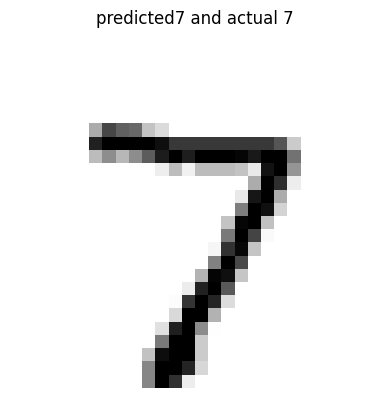

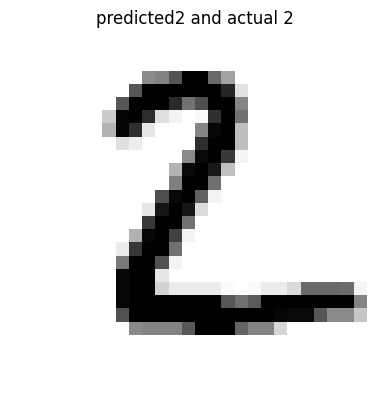

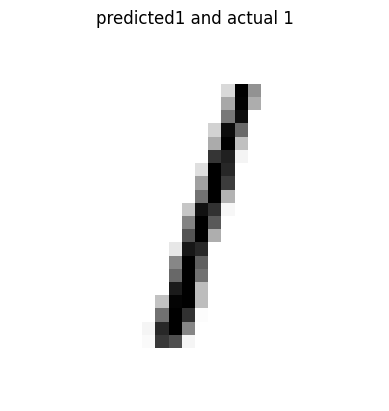

In [ ]:
for data, pred, actual_data in zip(X_new,y_pred,y_new):
  plt.imshow(data,cmap="binary")
  plt.title(f"predicted{pred} and actual {actual_data}")
  plt.axis("off")
  plt.show()